In [1]:
import numpy as np
from scipy.signal import zpk2tf,freqz
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile as wav
from scipy.fft import fft,fftfreq
from numpy import log10

In /home/akshay/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/akshay/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/akshay/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/akshay/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/akshay/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

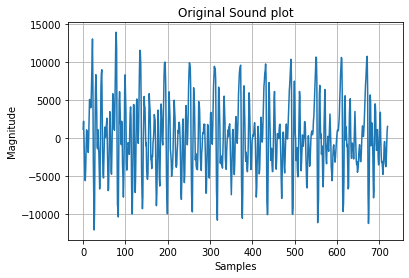

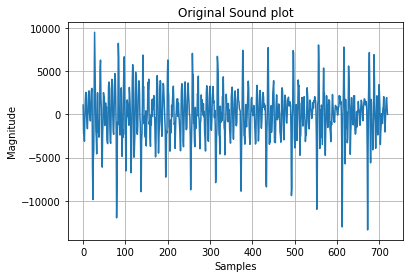

In [2]:
sound_file = wav.read('aa.wav')
fs,sound = sound_file[0],sound_file[1]
pre_sound = np.zeros(len(sound))
alpha=0.98

plt.figure()
plt.plot(sound)
plt.title('Original Sound plot')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('Magnitude')
plt.show()

for i in range(1,len(sound)):
    pre_sound[i-1] = sound[i] - alpha*sound[i-1]

plt.figure()
plt.plot(pre_sound)
plt.title('Original Sound plot')
plt.grid()
plt.xlabel('Samples')
plt.ylabel('Magnitude')
plt.show()    
    

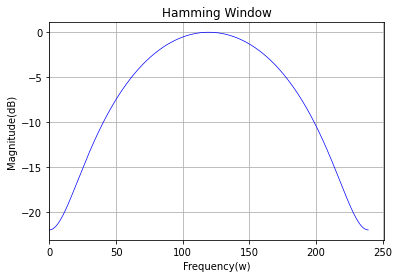

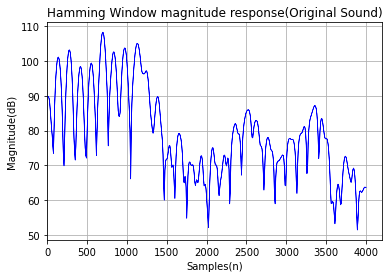

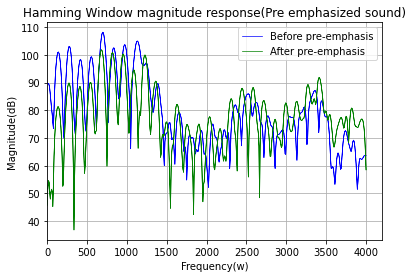

In [3]:
win_length = 30
window_size = int(win_length*fs/1000)
center = int(len(pre_sound)/2)
window_signal_pre = pre_sound[center - window_size : center] * np.hamming(window_size)
window_signal = sound[:window_size] * np.hamming(window_size)
dft_orig = fft(window_signal, n=1024)
dft_pre = fft(window_signal_pre, n=1024)
freq = fftfreq(dft_orig.shape[-1], 1/fs)



plt.figure()
plt.title("Hamming Window")
plt.plot(20*log10(np.hamming(window_size)),'b',linewidth=0.7)
plt.ylabel("Magnitude(dB)")
plt.xlabel("Frequency(w)")
plt.xlim(xmin=0)
plt.grid("True")
plt.show()

len_ = int(len(dft_orig)/2)
plt.figure()
plt.title("Hamming Window magnitude response(Original Sound)")
plt.plot(abs(freq),20*log10(abs(dft_orig)),'b',linewidth=0.7)
plt.ylabel("Magnitude(dB)")
plt.xlabel("Samples(n)")
plt.xlim(xmin=0)
plt.grid("True")
plt.show()



dft_pre = fft(window_signal_pre, n=1024)
freq = fftfreq(dft_pre.shape[-1], 1/fs)

len_ = int(len(dft_pre)/2)
plt.figure()
plt.title("Hamming Window magnitude response(Pre emphasized sound)")
plt.plot(abs(freq),20*log10(abs(dft_orig)),'b',linewidth=0.7)
plt.plot(abs(freq),20*log10(abs(dft_pre)),'g',linewidth=0.7)
plt.ylabel("Magnitude(dB)")
plt.xlabel("Frequency(w)")
plt.xlim(xmin=0)
plt.grid("True")

plt.legend(['Before pre-emphasis', 'After pre-emphasis'])
plt.show()



In [4]:
def LPRecursion(window_signal,p):
    r= np.correlate(window_signal_pre,window_signal_pre,mode='full')
    r= r[-len(window_signal_pre):]  # keeping only the positive coefficients since correlation is symmetric

    e = np.zeros(p+1)
    a = np.zeros((p+1,p+1))
    g = np.zeros(p+1)

    e[0] = r[0]
    g[0] = np.sqrt(e[0])
    a[1][0] = 1

    k=r[1]/e[0]
    a[1][1] = k
    e[1]=(1-k**2)*e[0]
    g[1] = np.sqrt(e[1])

    for i in range(2,p+1):    
        temp = 0
        for j in range(1,i):
            temp+=a[i-1][j] *r[i-j]
        k = (r[i] - temp)/e[i-1]    
        a[i][i] = k    
        for j in range(1,i):
            a[i][j] = a[i-1][j] - k*a[i-1][i-j]    
        e[i] = (1-k**2)*e[i-1]
        g[i] = np.sqrt(e[i])
        a[i][0]=1
    
    return g,e,a


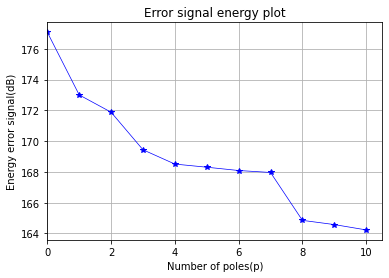

In [5]:
p=10
g,e,a = LPRecursion(window_signal_pre,p)

plt.figure()
plt.title("Error signal energy plot")
plt.plot(20*log10(abs(e)),'b-*',linewidth=0.7)
plt.ylabel("Energy error signal(dB)")
plt.xlabel("Number of poles(p)")
plt.xlim(xmin=0)
plt.grid("True")
plt.show()


In [6]:
def poleZeroPlot(b,a):
    poles = np.zeros_like(a)
    poles[0]=1
    poles[1:len(a)] = -a[1:len(a)];
    b=[b]
    z, p, k = signal.tf2zpk(b, poles)
    p = p[p!=0]
    
    fig = plt.figure(figsize=(5,5))
    ax=fig.add_subplot(1, 1, 1)
    
    plt.plot(np.real(z), np.imag(z), 'ob')
    plt.plot(np.real(p), np.imag(p), 'sr',markersize=5,fillstyle="full")
    circ = plt.Circle((0, 0), radius=1,facecolor='None',color='black', ls='solid', alpha=0.1)
    ax.add_patch(circ)
    plt.axhline(0,color='black',alpha=0.4)
    plt.axvline(0,color='black',alpha=0.4)
    plt.ylim((-2.0, 2.0))
    plt.xlim((-2.0,2.0))
    plt.legend(['Zeros', 'Poles'])
    plt.ylabel('Real')
    plt.xlabel('Imaginary')
    plt.grid()

    plt.show()

/home/akshay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  


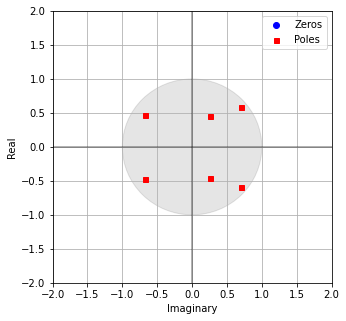

/home/akshay/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  


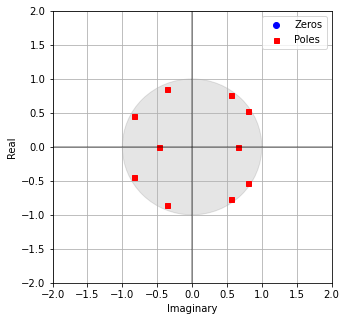

[ 1.          0.5669346   0.0614498  -0.34610783 -0.37455626  0.23705569
 -0.15629367  0.          0.          0.          0.        ]
[ 1.          0.54376135  0.13538363 -0.28452579 -0.6512273   0.11494321
  0.13529999  0.22244474 -0.63555343  0.06157738  0.19790781]


In [7]:
poleZeroPlot(g[6],a[6][:])
poleZeroPlot(g[10],a[10][:])
print(a[6][:])
print(a[10][:])

In [8]:
def plot_spectrum(p,a,g):
    for i in range(1,p+1):

        poles = np.zeros_like(a[i])
        poles[0] = a[i][0]
        poles[1:] = -a[i][1:len(a[i])+1] 
        w,h = freqz(g[i],poles)

        plt.figure()
        plt.title("LPC spectrum for poles="+str(i))
        plt.plot(abs(freq),20*log10(abs(dft_pre)),'g',linewidth=0.7)
        plt.plot(w*fs/(2*np.pi),20*log10(abs(h)),'r',linewidth=2)
        plt.ylabel("Magnitude(dB)")
        plt.xlabel("Frequency(w)")
        plt.xlim(xmin=0)
        plt.grid("True")
        plt.legend(['Hamming window output' , 'LP analysis estimate'])
        plt.show()

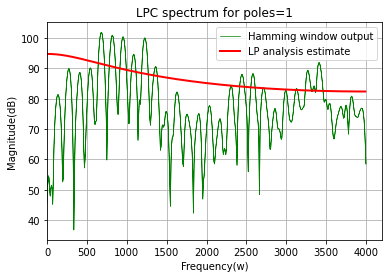

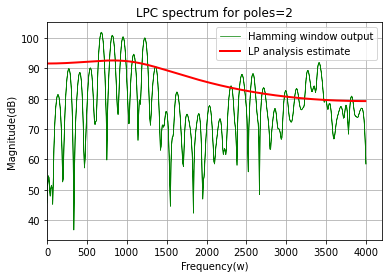

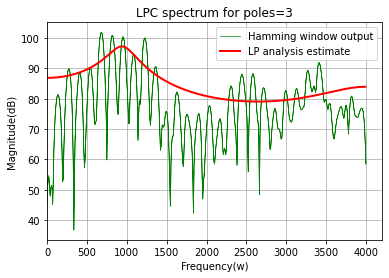

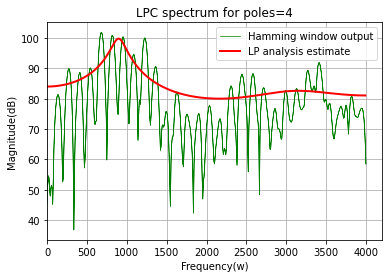

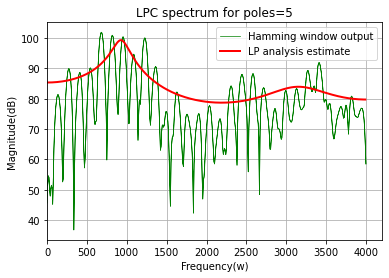

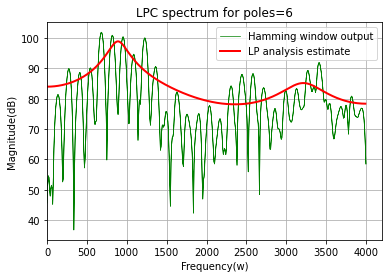

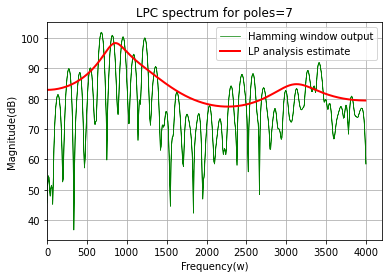

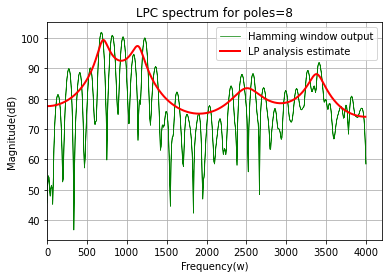

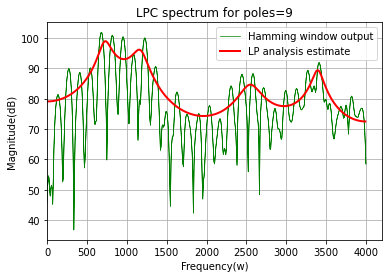

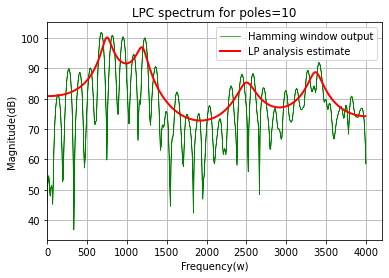

In [9]:
order =10


plot_spectrum(order,a,g)
input_signal = window_signal_pre
zeros_filter = a[order][:]
poles = g[order]
output = np.zeros(len(input_signal))

for i in range(len(input_signal)):
    temp = 0
    for j in range(0,order):
        if i-j>=0:
            output[i]+=(-zeros_filter[j]*input_signal[i-j])
    output[i] = output[i]/poles




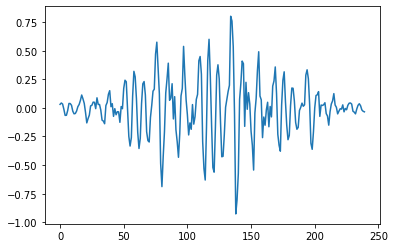

In [10]:
plt.plot(output)

In [11]:
acf = np.correlate(output,output,mode="full")
sorted_acf =np.argsort(acf)



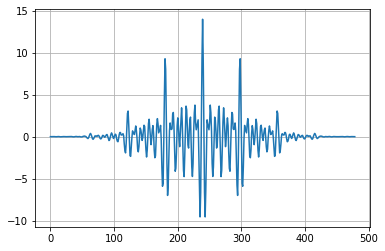

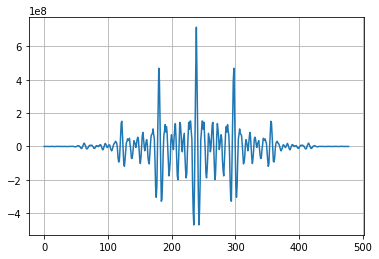

In [12]:
plt.plot(acf)
plt.grid()
plt.show()
plt.plot(np.correlate(window_signal_pre,window_signal_pre,mode="full"))
plt.grid()
plt.show()

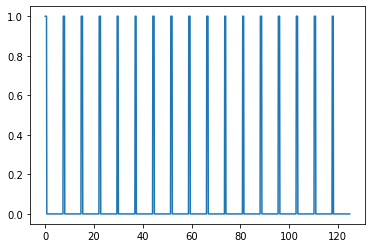

In [13]:
t = np.linspace(0, 300, int(300*fs/1000), endpoint=False)
sig = (signal.square(2 * np.pi *0.136* t[0:1000],duty=0.08)+1)/2
plt.plot(t[0:1000], sig)



In [14]:
order =10
output=np.zeros(sig.shape)

for i in range(len(sig)):
    output[i] = g[order]*sig[i]
    for j in range(0,order):
        if i-j>=0:
            output[i]+=a[order][j]*output[i-j]

output_pre = np.zeros(sig.shape)
alpha=0.98
for i in range(1,len(output)):
    output_pre[i] = output[i] + alpha*output_pre[i-1]
    
maxi = np.max(output_pre)
output_pre = output_pre/maxi

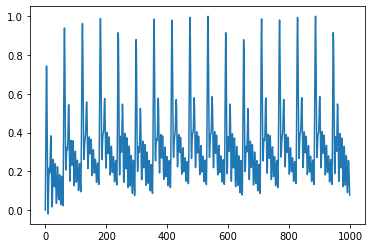

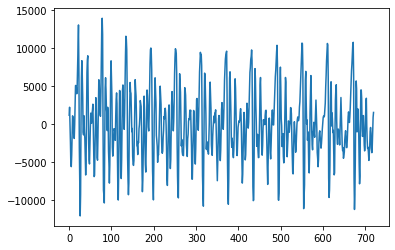

In [15]:
plt.plot(output_pre)
wav.write('result.wav',fs,output_pre)
plt.show()
plt.plot(sound)
plt.show()